In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import io
import os
from pptx import Presentation
from pptx.util import Inches
import seaborn as sns
import numpy as np

In [2]:
# Path to csv data file
pathp = r'C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Metals_PM2.5_PM0.1_forPython.csv'

# output_folder is the destination folder of all of the plots below
output_dir = r'C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output'

In [3]:
df = pd.read_csv(pathp)
df['date'] = pd.to_datetime(df['date'])

Heatmap saved successfully to: C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output\Correlation_Heatmap_Clean_Labels.png


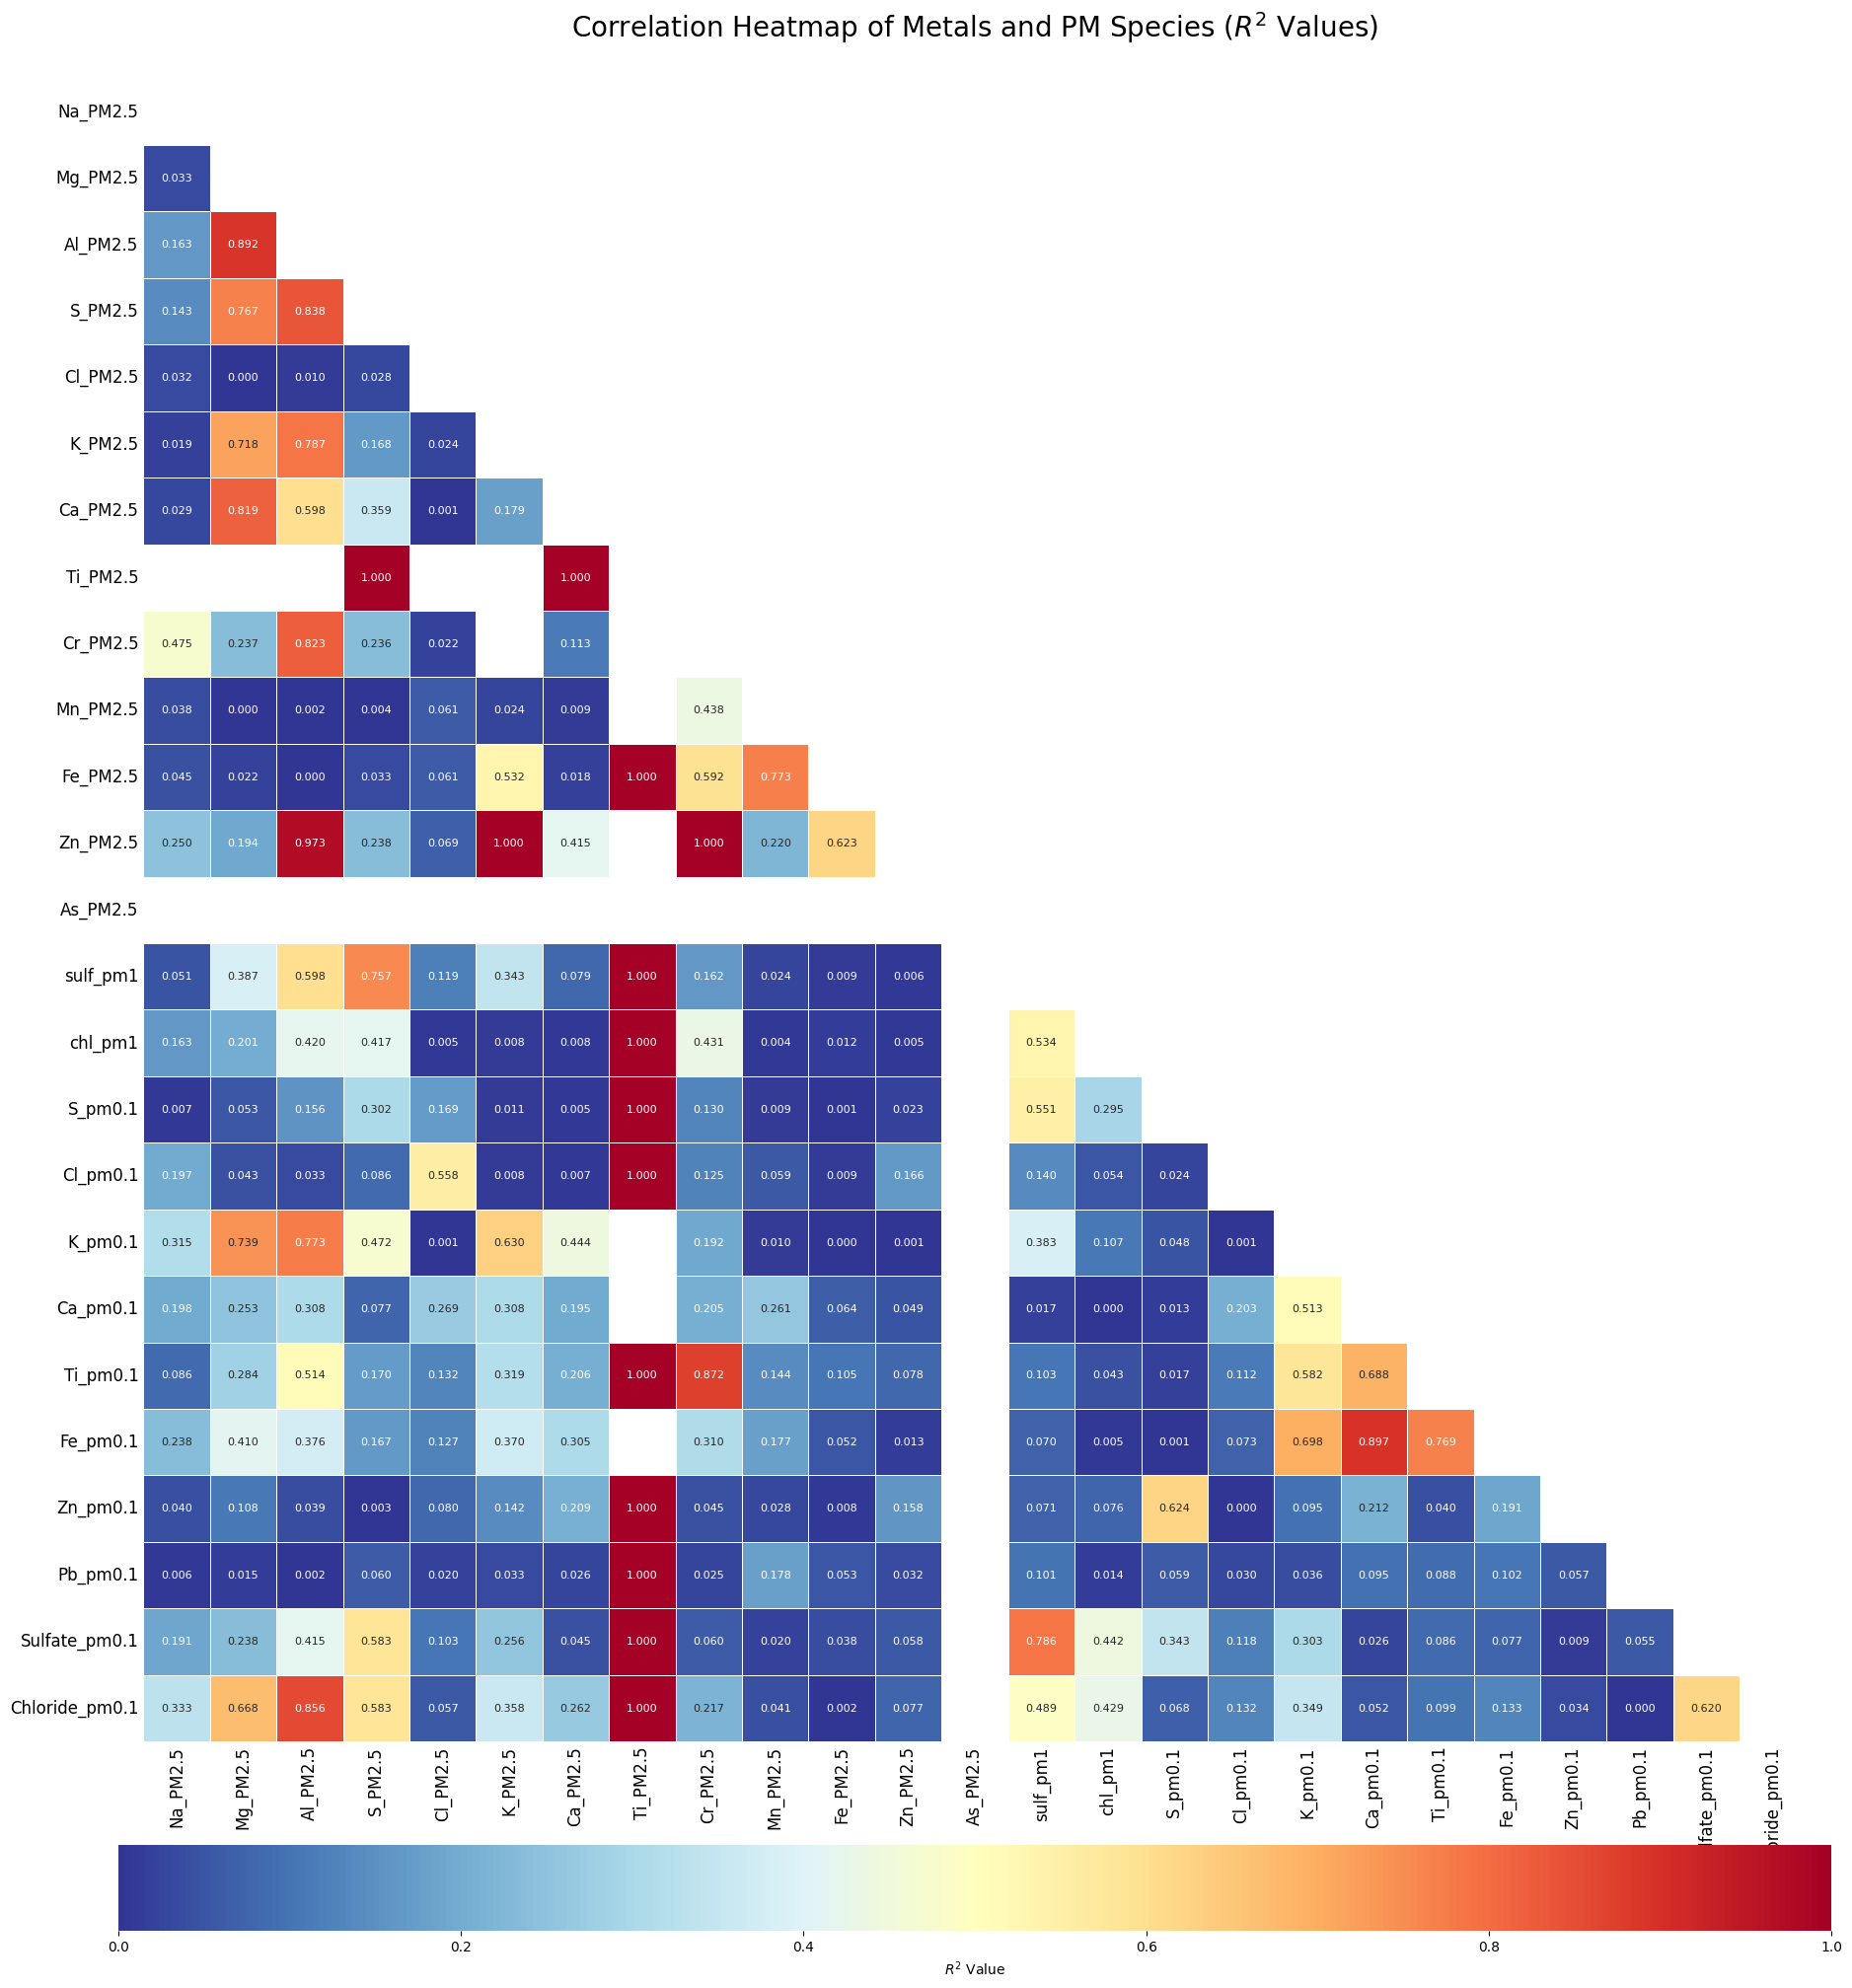

In [4]:
# Filter out 'date', and any column containing 'sx3' or 's_x3'
cols_to_keep = [
    col for col in df.columns
    if col.lower() != 'date' and 'x3' not in col.lower()
]
df = df[cols_to_keep]

# Clean the column names by removing the specific unit strings
df.columns = [col.replace('_ug.m3', '').replace('_ng.m3', '') for col in df.columns]

# 2. Calculate Correlation Matrix and R-squared
# df.corr() gives 'r'. We square it to get R^2.
corr_matrix = df.corr(method='pearson')
r2_matrix = corr_matrix ** 2

# 3. Create a Mask for the Upper Triangle
mask = np.triu(np.ones_like(r2_matrix, dtype=bool))

# 4. Set up the Matplotlib Figure
f, ax = plt.subplots(figsize=(22, 22))

# 5. Define the Colormap
cmap = 'RdYlBu_r'

# 6. Draw the Heatmap
sns.heatmap(r2_matrix,
            mask=mask,
            cmap=cmap,
            vmin=0, vmax=1,
            center=0.5,
            square=True,
            linewidths=.5,
            annot=True,            # This turns on the numbers inside the boxes
            fmt=".3f",             # Formats the numbers to 3 decimal places (e.g., 0.001)
            annot_kws={"size": 8}, # Sets the font size for the numbers inside the boxes
            cbar_kws={"orientation": "horizontal", "shrink": 0.8, "pad": 0.05, "label": "$R^2$ Value"},
            xticklabels=True, yticklabels=True
           )

# 7. Customize Plot Labels and Title
# Increased fontsize to 12 since the names are shorter now
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap of Metals and PM Species ($R^2$ Values)', fontsize=20, y=1.02)

ax.tick_params(axis='both', which='both', length=0)

# 8. Save the Plot
output_dir = r'C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'Correlation_Heatmap_Clean_Labels.png')

plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"Heatmap saved successfully to: {output_path}")
plt.show()

Plot saved successfully to: C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output\Chlorine_Chloride_Timeseries.png


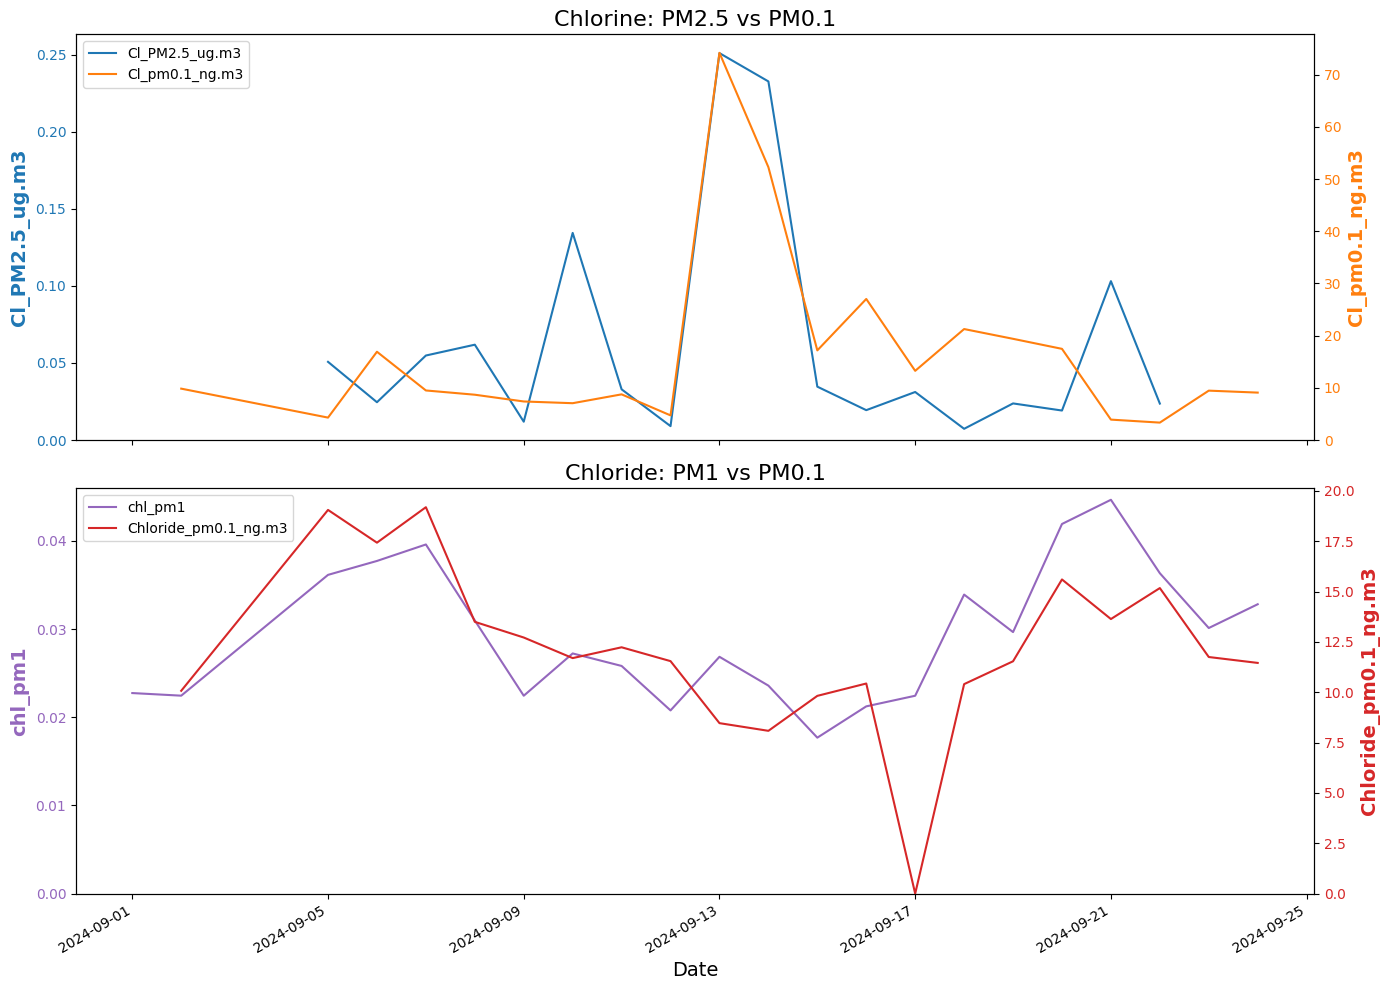

In [8]:
df = pd.read_csv(pathp)
df['date'] = pd.to_datetime(df['date'])

# --- IMPORTANT: Column Name Variables ---
# Update these string names if your CSV still has units attached!
# For example, if it's 'Cl_PM2.5_ug.m3' in the dataframe, change the string here.
col_cl_pm25 = 'Cl_PM2.5_ug.m3'
col_cl_pm01 = 'Cl_pm0.1_ng.m3'
col_chl_pm1 = 'chl_pm1'
col_chloride_pm01 = 'Chloride_pm0.1_ng.m3'

# 2. Create the Figure and Subplots
# 2 rows, 1 column. sharex=True aligns the dates on the x-axis for both plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# ==========================================
# --- TOP PLOT (ax1): Cl_PM2.5 vs Cl_PM0.1 ---
# ==========================================

# Left Axis: Cl_PM2.5
ax1.plot(df['date'], df[col_cl_pm25], color='tab:blue', label=col_cl_pm25)
ax1.set_ylabel(col_cl_pm25, color='tab:blue', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(bottom=0)

# Right Axis: Cl_PM0.1
ax1_twin = ax1.twinx()
ax1_twin.plot(df['date'], df[col_cl_pm01], color='tab:orange', label=col_cl_pm01)
ax1_twin.set_ylabel(col_cl_pm01, color='tab:orange', fontsize=14, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='tab:orange')
ax1_twin.set_ylim(bottom=0)

# Combine legends for top plot
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax1.set_title('Chlorine: PM2.5 vs PM0.1', fontsize=16)


# =======================================================
# --- BOTTOM PLOT (ax2): chl_pm1 vs chloride_pm0.1 ---
# =======================================================

# Left Axis: chl_pm1
ax2.plot(df['date'], df[col_chl_pm1], color='tab:purple', label=col_chl_pm1)
ax2.set_ylabel(col_chl_pm1, color='tab:purple', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='tab:purple')
ax2.set_ylim(bottom=0)

# Right Axis: chloride_pm0.1
ax2_twin = ax2.twinx()
ax2_twin.plot(df['date'], df[col_chloride_pm01], color='tab:red', label=col_chloride_pm01)
ax2_twin.set_ylabel(col_chloride_pm01, color='tab:red', fontsize=14, fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor='tab:red')
ax2_twin.set_ylim(bottom=0)

# Combine legends for bottom plot
lines_3, labels_3 = ax2.get_legend_handles_labels()
lines_4, labels_4 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines_3 + lines_4, labels_3 + labels_4, loc='upper left')
ax2.set_title('Chloride: PM1 vs PM0.1', fontsize=16)

# X-axis label only goes on the bottom plot since they share it
ax2.set_xlabel('Date', fontsize=14)

# 3. Format and Save
fig.autofmt_xdate() # Rotates the dates so they don't overlap
plt.tight_layout()

# Save the plot to your specified path
output_dir = r'C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'Chlorine_Chloride_Timeseries.png')

plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to: {output_path}")

plt.show()

Plot saved successfully to: C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output\Sulfur_3Panel_Timeseries.png


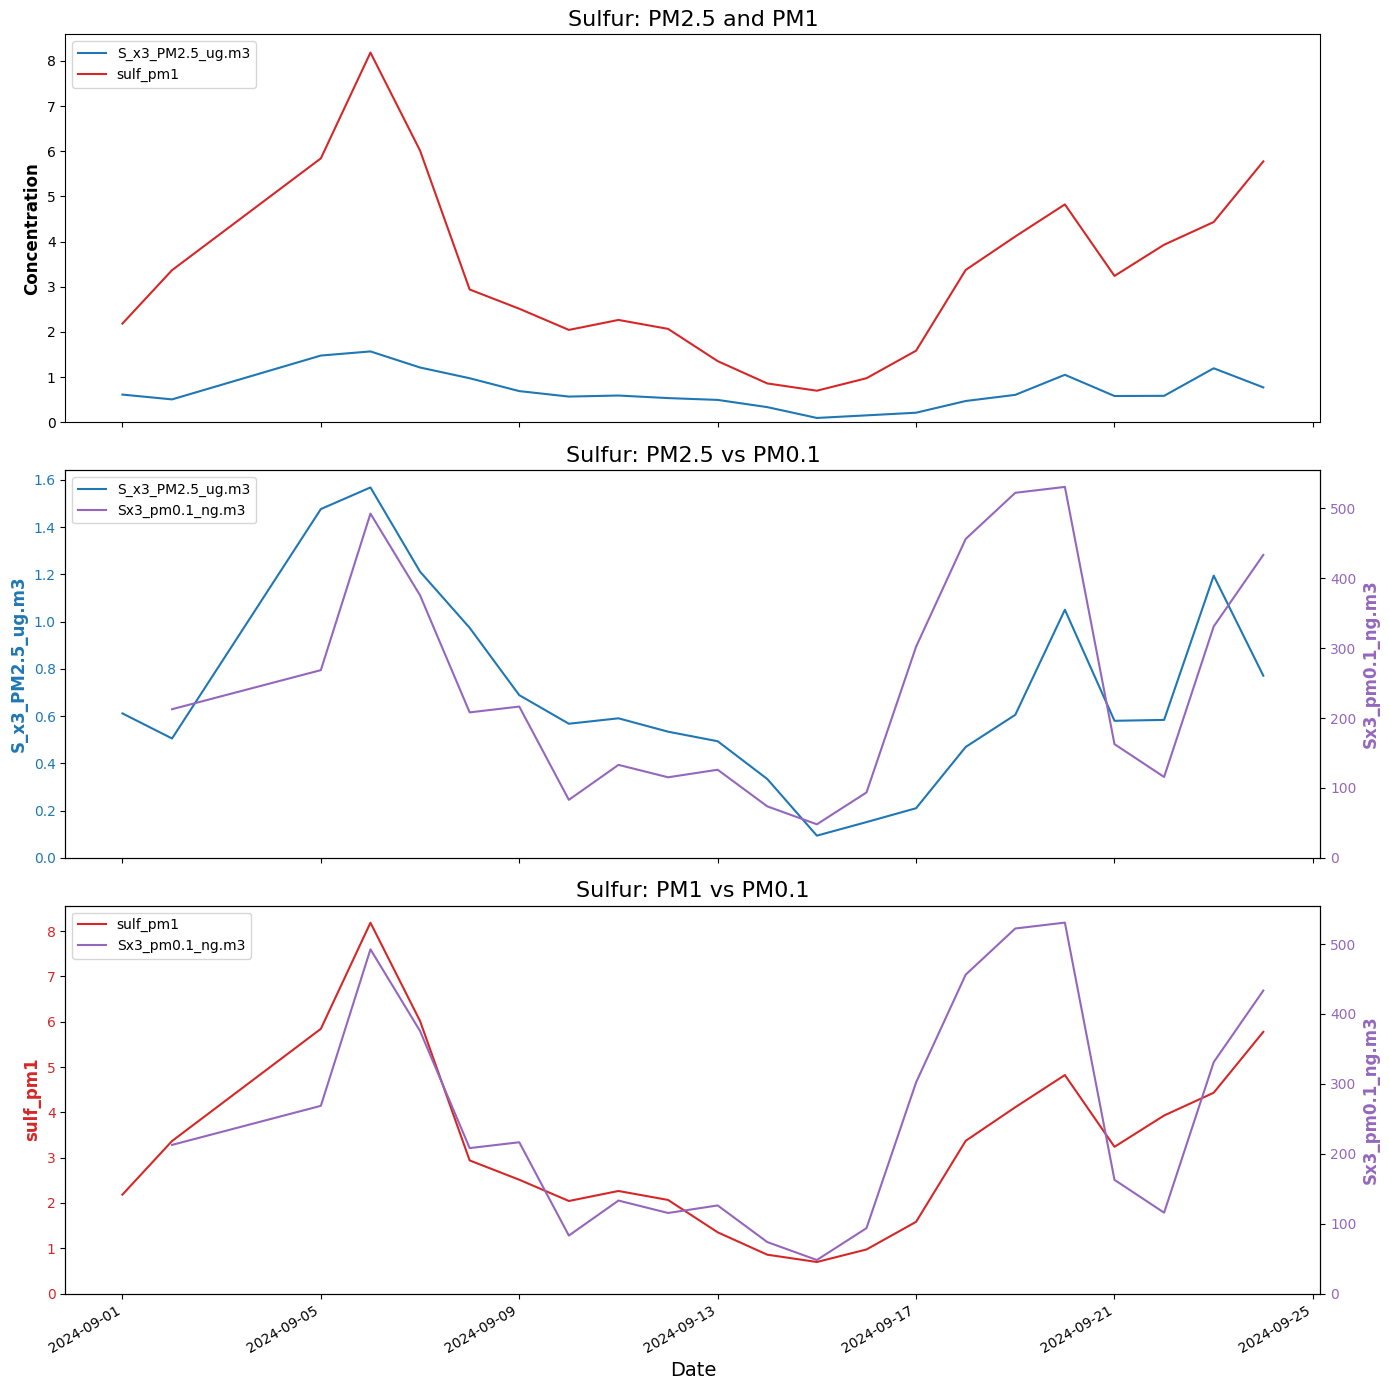

In [7]:
df = pd.read_csv(pathp)

# Ensure the 'date' column is recognized as actual datetime objects
df['date'] = pd.to_datetime(df['date'])

# --- IMPORTANT: Column Name Variables ---
col_s_pm25 = 'S_x3_PM2.5_ug.m3'
col_sulf_pm1 = 'sulf_pm1'
col_sx3_pm01 = 'Sx3_pm0.1_ng.m3'

# 2. Create the Figure and Subplots (3 rows, 1 column)
# Increased figsize to (14, 14) to give all three plots plenty of room
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# =================================================================
# --- TOP PLOT (ax1): S_x3_PM2.5_ug.m3 & sulf_pm1 (Same Axis) ---
# =================================================================
ax1.plot(df['date'], df[col_s_pm25], color='tab:blue', label=col_s_pm25)
ax1.plot(df['date'], df[col_sulf_pm1], color='tab:red', label=col_sulf_pm1)
ax1.set_ylabel('Concentration', fontsize=12, fontweight='bold')
ax1.set_ylim(bottom=0)
ax1.legend(loc='upper left')
ax1.set_title('Sulfur: PM2.5 and PM1', fontsize=16)

# =======================================================================
# --- MIDDLE PLOT (ax2): S_x3_PM2.5 (Left) vs Sx3_pm0.1 (Right) ---
# =======================================================================
# Left Axis
ax2.plot(df['date'], df[col_s_pm25], color='tab:blue', label=col_s_pm25)
ax2.set_ylabel(col_s_pm25, color='tab:blue', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(bottom=0)

# Right Axis
ax2_twin = ax2.twinx()
ax2_twin.plot(df['date'], df[col_sx3_pm01], color='tab:purple', label=col_sx3_pm01)
ax2_twin.set_ylabel(col_sx3_pm01, color='tab:purple', fontsize=12, fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor='tab:purple')
ax2_twin.set_ylim(bottom=0)

# Combine legends
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_2_twin, labels_2_twin = ax2_twin.get_legend_handles_labels()
ax2.legend(lines_2 + lines_2_twin, labels_2 + labels_2_twin, loc='upper left')
ax2.set_title('Sulfur: PM2.5 vs PM0.1', fontsize=16)

# =======================================================================
# --- BOTTOM PLOT (ax3): sulf_pm1 (Left) vs Sx3_pm0.1 (Right) ---
# =======================================================================
# Left Axis
ax3.plot(df['date'], df[col_sulf_pm1], color='tab:red', label=col_sulf_pm1)
ax3.set_ylabel(col_sulf_pm1, color='tab:red', fontsize=12, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.set_ylim(bottom=0)

# Right Axis
ax3_twin = ax3.twinx()
ax3_twin.plot(df['date'], df[col_sx3_pm01], color='tab:purple', label=col_sx3_pm01)
ax3_twin.set_ylabel(col_sx3_pm01, color='tab:purple', fontsize=12, fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor='tab:purple')
ax3_twin.set_ylim(bottom=0)

# Combine legends
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_3_twin, labels_3_twin = ax3_twin.get_legend_handles_labels()
ax3.legend(lines_3 + lines_3_twin, labels_3 + labels_3_twin, loc='upper left')
ax3.set_title('Sulfur: PM1 vs PM0.1', fontsize=16)

# X-axis label only goes on the bottom plot since they share it
ax3.set_xlabel('Date', fontsize=14)

# 3. Format and Save
fig.autofmt_xdate()
plt.tight_layout()

# Save the plot
output_dir = r'C:\Users\GeorgiaRg\Documents\Poros2024\Xact\Python_Output'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'Sulfur_3Panel_Timeseries.png')

plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to: {output_path}")

plt.show()

In [ ]:
# Get all columns except the date column
data_cols = [col for col in df.columns if col.lower() != 'date']

# Generate all unique pairs of columns
column_pairs = list(itertools.combinations(data_cols, 2))

# 2. Initialize the PowerPoint Presentation
prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]

print(f"Total slides to generate: {len(column_pairs)}")

# 3. Loop through each pair to generate plots and slides
for col1, col2 in column_pairs:

    # Create a figure with 1 row and 2 columns
    # gridspec_kw makes the timeseries (left) twice as wide as the scatter plot (right)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5), gridspec_kw={'width_ratios': [2, 1]})

    # --- LEFT PLOT: TIMESERIES (LINES) ---
    is_col1_pm01 = 'pm0.1' in col1.lower()
    is_col2_pm01 = 'pm0.1' in col2.lower()

    # If exactly ONE of the columns is pm0.1, put it on the right axis
    if is_col1_pm01 != is_col2_pm01:
        primary_col = col2 if is_col1_pm01 else col1
        secondary_col = col1 if is_col1_pm01 else col2

        # Plot Primary Line
        ax1.plot(df['date'], df[primary_col], label=primary_col, color='tab:blue')
        ax1.set_ylabel(primary_col, color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Plot Secondary Line on twin axis
        ax1_twin = ax1.twinx()
        ax1_twin.plot(df['date'], df[secondary_col], label=secondary_col, color='tab:orange')
        ax1_twin.set_ylabel(secondary_col, color='tab:orange')
        ax1_twin.tick_params(axis='y', labelcolor='tab:orange')

        # Combine legends from both axes
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax1_twin.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    else:
        # If both or neither are pm0.1, plot them on the same axis
        ax1.plot(df['date'], df[col1], label=col1, color='tab:blue')
        ax1.plot(df['date'], df[col2], label=col2, color='tab:orange')
        ax1.set_ylabel('Concentration')
        ax1.legend(loc='upper left')

    ax1.set_xlabel('Date')
    ax1.set_title(f'Timeseries: {col1} and {col2}')
    fig.autofmt_xdate()

    # --- RIGHT PLOT: SCATTER WITH R2 ---
    scatter_data = df[[col1, col2]].dropna()

    if len(scatter_data) > 1:
        r = scatter_data[col1].corr(scatter_data[col2])
        r_squared = r**2

        ax2.scatter(scatter_data[col1], scatter_data[col2], alpha=0.6, color='tab:purple')

        ax2.text(0.05, 0.95, f'$R^2 = {r_squared:.3f}$',
                 transform=ax2.transAxes,
                 fontsize=12, verticalalignment='top',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
    else:
        ax2.text(0.5, 0.5, 'Insufficient overlapping data',
                 transform=ax2.transAxes, ha='center', va='center')

    ax2.set_xlabel(col1)
    ax2.set_ylabel(col2)
    ax2.set_title(f'Scatter: {col1} vs {col2}')

    plt.tight_layout()

    # --- SAVE TO MEMORY AND ADD TO PPTX ---
    image_stream = io.BytesIO()
    plt.savefig(image_stream, format='png', dpi=100)
    plt.close(fig)
    image_stream.seek(0)

    slide = prs.slides.add_slide(blank_slide_layout)
    slide.shapes.add_picture(image_stream, Inches(0.5), Inches(1), width=Inches(9))

# Join the path and the filename together safely
ppt_filepath = os.path.join(output_dir, 'Data_Analysis_Plots_Lines.pptx')

prs.save(ppt_filepath)
print(f"Presentation saved successfully to: {ppt_filepath}")